Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Aula 3 - Data Wrangling

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---



In [1]:
!pip install patool 

In [2]:
# Bibliotecas utilizadas
import patoolib
import pandas as pd

Extraia os dados baixados de https://covid.saude.gov.br/

In [4]:
# Código para extrair o arquivo rar
patoolib.extract_archive('HIST_PAINEL_COVIDBR_17ago2022.rar')

patool: Extracting HIST_PAINEL_COVIDBR_17ago2022.rar ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -o.\Unpack_1rt3670l -- HIST_PAINEL_COVIDBR_17ago2022.rar
patool: ... HIST_PAINEL_COVIDBR_17ago2022.rar extracted to `HIST_PAINEL_COVIDBR_17ago2022' (multiple files in root).


'HIST_PAINEL_COVIDBR_17ago2022'

Criar uma lista de `Dataframes`. Estamos aqui fazendo um casting para tornar a coluna de datas em um formato específico de datas do Python ao invés de texto. Também se colocou a coluna de data como o índice.

In [5]:
lista_df = []

anos = (2020, 2021, 2022)

for ano in anos:
    for parte in (1,2):
        arq = 'HIST_PAINEL_COVIDBR_17ago2022/' + f'HIST_PAINEL_COVIDBR_{ano}_Parte{parte}_17ago2022.csv'
        print(f'lendo o arquivo {arq}...')
        lista_df.append( pd.read_csv(arq, sep=';', parse_dates=['data'], index_col=['data']) )


lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2020_Parte1_17ago2022.csv...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2020_Parte2_17ago2022.csv...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2021_Parte1_17ago2022.csv...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2021_Parte2_17ago2022.csv...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2022_Parte1_17ago2022.csv...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2022_Parte2_17ago2022.csv...


In [6]:
lista_df

[                  regiao estado municipio  coduf    codmun  codRegiaoSaude  \
 data                                                                         
 2020-02-25        Brasil    NaN       NaN     76       NaN             NaN   
 2020-02-26        Brasil    NaN       NaN     76       NaN             NaN   
 2020-02-27        Brasil    NaN       NaN     76       NaN             NaN   
 2020-02-28        Brasil    NaN       NaN     76       NaN             NaN   
 2020-02-29        Brasil    NaN       NaN     76       NaN             NaN   
 ...                  ...    ...       ...    ...       ...             ...   
 2020-07-27  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
 2020-07-28  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
 2020-07-29  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
 2020-07-30  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
 2020-07-31  Centro-Oeste     DF  Brasília     53  5

Faça aqui o concatenamento das linhas dos `dataframes` da lista em um `dataframe` único. 

In [7]:
df = pd.concat(lista_df, axis=0)
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-02-25,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
2020-02-26,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2020-02-27,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
2020-02-28,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
2020-02-29,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-13,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,32,3015268.0,835156.0,0,11825,0,NaN,NaN,1.0
2022-08-14,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,33,3015268.0,835156.0,0,11825,0,NaN,NaN,1.0
2022-08-15,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,33,3015268.0,835515.0,359,11825,0,NaN,NaN,1.0


Nosso objetivo é mostrar somente os valores a nível de Brasil. Faça um filtro das linhas baseado na coluna `regiao` somente para a correspondência `Brasil`. Salve este filtro em um `Dataframe`.

In [8]:
df = df[df['regiao'] == 'Brasil']
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-02-25,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
2020-02-26,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2020-02-27,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
2020-02-28,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
2020-02-29,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-13,Brasil,NaN,NaN,76,NaN,NaN,NaN,32,210147125.0,34165857.0,17726,681400,147,32966689.0,517768.0,NaN
2022-08-14,Brasil,NaN,NaN,76,NaN,NaN,NaN,33,210147125.0,34170286.0,4429,681437,37,32993386.0,495463.0,NaN
2022-08-15,Brasil,NaN,NaN,76,NaN,NaN,NaN,33,210147125.0,34178240.0,7954,681557,120,33033317.0,463366.0,NaN


Selecione somente as colunas 'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos' do `Dataframe` e descarte as demais.

In [9]:
df = df[['casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']]

Faça aqui o gráfico de 'casosAcumulado' ao longo dos dias desde o começo da pandemia.

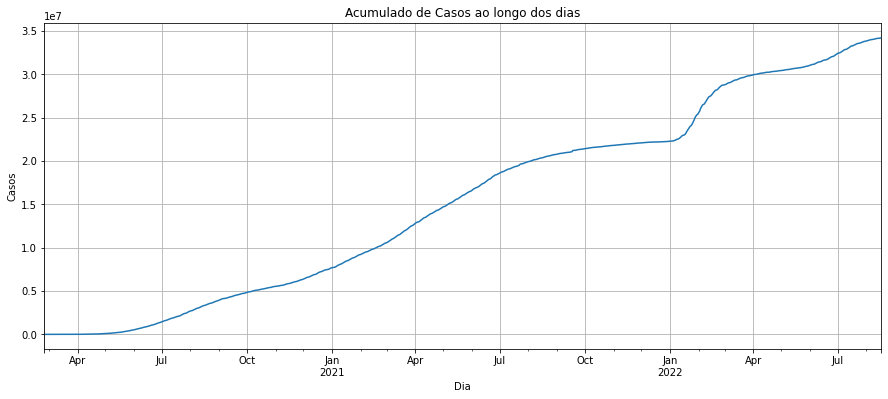

In [10]:
ax = df['casosAcumulado'].plot(figsize=(15,6), grid=True, title='Acumulado de Casos ao longo dos dias' );
ax.set_xlabel('Dia');
ax.set_ylabel('Casos');

Faça aqui o gráfico de 'obitosAcumulado' ao longo dos dias desde o começo da pandemia.

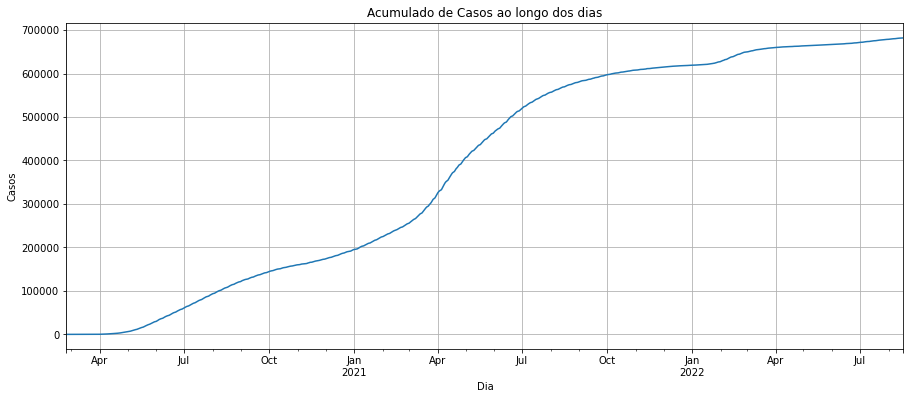

In [11]:
ax = df['obitosAcumulado'].plot(figsize=(15,6), grid=True, title='Acumulado de Casos ao longo dos dias' );
ax.set_xlabel('Dia');
ax.set_ylabel('Casos');

Qual a quantidade total de óbitos por Covid19 no Brasil a partir da análise desses dados?

In [12]:
df['obitosAcumulado'].max()

682010

Crie uma coluna com a media móvel dos 'casosNovos' e 'obitosNovos'. Use uma janela de 7 dias para o cálculo da média móvel.

Use o seguinte exemplo como referência para calcular a média móvel.

```python

df['nomeColuna'].rolling(Janela).mean()
```

In [13]:
medCasosNovos = df['casosNovos'].rolling(7).mean()
medObitosNovos = df['obitosNovos'].rolling(7).mean()

In [14]:
df['medCasosNovos'] = medCasosNovos
df['medObitosNovos'] = medObitosNovos
df

C:\Users\307145\AppData\Local\Temp\ipykernel_11308\3212017652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medCasosNovos'] = medCasosNovos
C:\Users\307145\AppData\Local\Temp\ipykernel_11308\3212017652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medObitosNovos'] = medObitosNovos


,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,medCasosNovos,medObitosNovos
data,,,,,,
2020-02-25,0.0,0,0,0,NaN,NaN
2020-02-26,1.0,1,0,0,NaN,NaN
2020-02-27,1.0,0,0,0,NaN,NaN
2020-02-28,1.0,0,0,0,NaN,NaN
2020-02-29,2.0,1,0,0,NaN,NaN
...,...,...,...,...,...,...
2022-08-13,34165857.0,17726,681400,147,22097.714286,208.714286
2022-08-14,34170286.0,4429,681437,37,21702.142857,205.857143
2022-08-15,34178240.0,7954,681557,120,20351.428571,198.714286


Faça um gráfico da evolução dos casos e sua média móvel. Use a coluna 'casosNovos' para a evolução diária de casos e a coluna referente à média móvel de casos que você calculou.

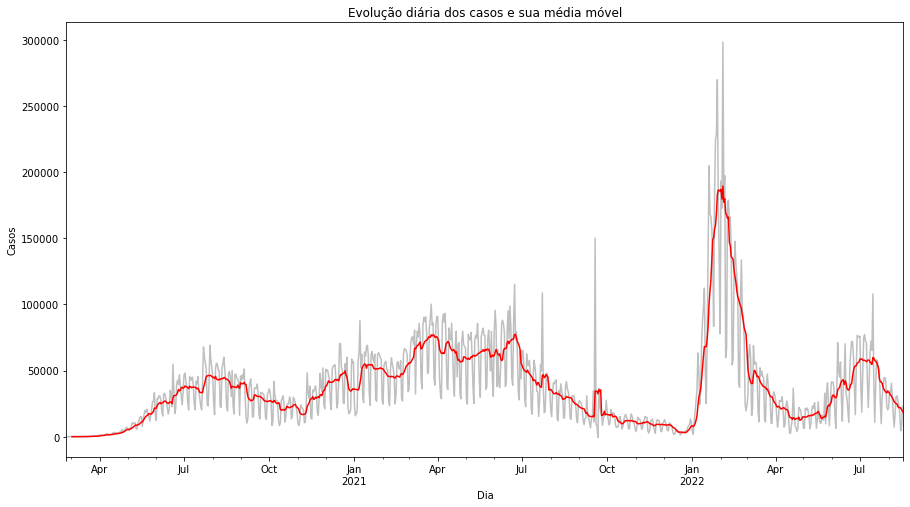

In [15]:
ax = df['casosNovos'].plot(figsize=(15,8), color=(0.75,0.75,0.75), title='Evolução diária dos casos e sua média móvel');
df['medCasosNovos'].plot(figsize=(15,8), color='r');

ax.set_xlabel('Dia');
ax.set_ylabel('Casos');

Faça um gráfico da evolução dos óbitos e sua média móvel. Use a coluna 'obitosNovos' para a evolução diária de óbitos e a coluna referente à média móvel de óbitos que você calculou.

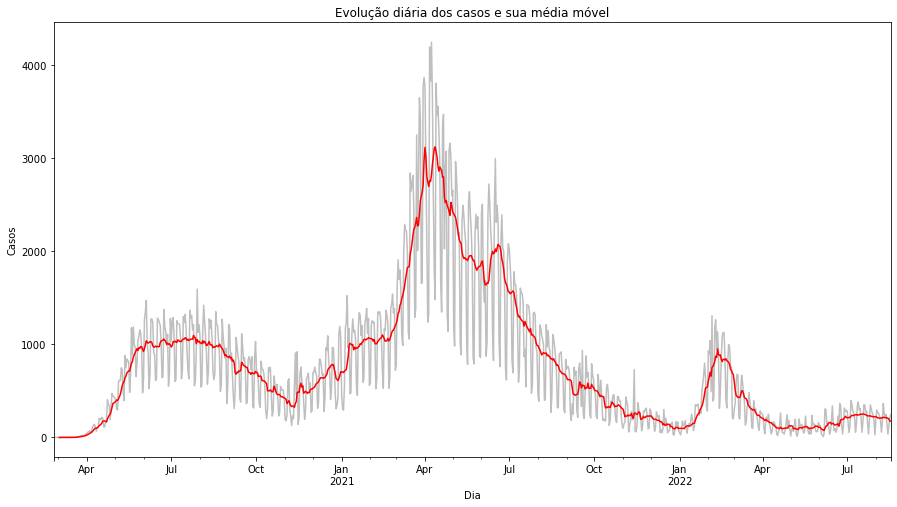

In [16]:
ax = df['obitosNovos'].plot(figsize=(15,8), color=(0.75,0.75,0.75), title='Evolução diária dos casos e sua média móvel');
df['medObitosNovos'].plot(figsize=(15,8), color='r');

ax.set_xlabel('Dia');
ax.set_ylabel('Casos');

Qual o dia com o maior registro de óbitos e qual é esse valor?

In [17]:
df[ df['obitosNovos'] == df['obitosNovos'].max() ]

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,medCasosNovos,medObitosNovos
data,,,,,,
2021-04-08,13279857.0,86652,345025,4249,62859.0,2820.142857


Qual o dia com a maior média móvel de óbitos e qual é esse valor?

In [18]:
df[ df['medObitosNovos'] == df['medObitosNovos'].max() ]

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,medCasosNovos,medObitosNovos
data,,,,,,
2021-04-12,13517808.0,35785,354617,1480,72029.571429,3123.571429


### Usando o plotly

In [19]:
!pip install plotly

In [20]:
import plotly.express as px

In [25]:
fig = px.area(df, y="obitosAcumulado", height=500, width=900, title='Óbitos Acumulados')
fig.update_layout(xaxis_rangeslider_visible=True)
fig

In [27]:
px.line(df, y="obitosNovos", height=500, width=900, title='Óbitos Novos')